## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
dataset = pd.read_csv('kyphosis.csv')

In [3]:
dataset

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
dataset.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Visualize the dataset

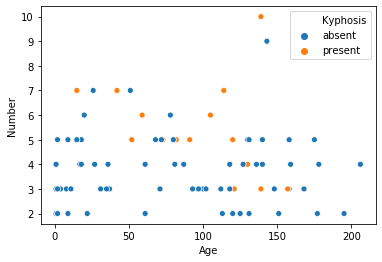

In [6]:
sns.scatterplot(x='Age', y='Number', hue=dataset['Kyphosis'], data=dataset)

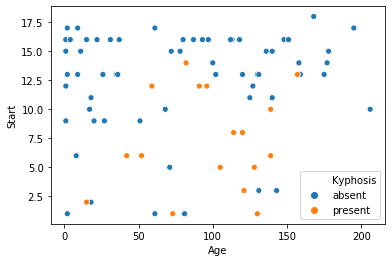

In [7]:
sns.scatterplot(x='Age', y='Start', hue=dataset['Kyphosis'], data=dataset)

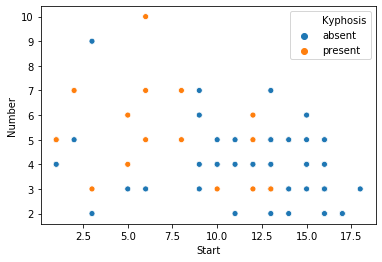

In [8]:
sns.scatterplot(x='Start', y='Number', hue=dataset['Kyphosis'], data=dataset)

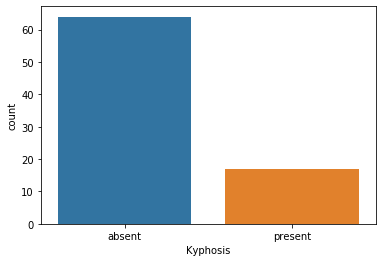

In [9]:
sns.countplot(dataset['Kyphosis'])

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
dataset['Kyphosis'] = labelencoder_y.fit_transform(dataset['Kyphosis'])

In [11]:
dataset

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [12]:
kyphosis_False = dataset[dataset['Kyphosis']==0]

In [13]:
kyphosis_True = dataset[dataset['Kyphosis']==1]

In [14]:
kyphosis_True

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [15]:
kyphosis_False

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [16]:
print('Disease present after operation percentage = ', (len(kyphosis_True)/len(dataset)) * 100 , '%')

Disease present after operation percentage =  20.98765432098765 %


In [17]:
print('Disease absent after operation (Successful operation) percentage = ', (len(kyphosis_False)/len(dataset)) * 100 , '%')

Disease absent after operation (Successful operation) percentage =  79.01234567901234 %


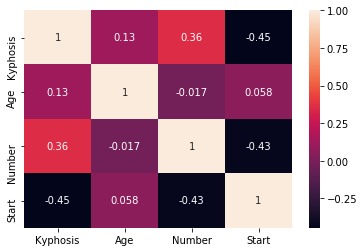

In [18]:
sns.heatmap(dataset.corr(), annot=True)

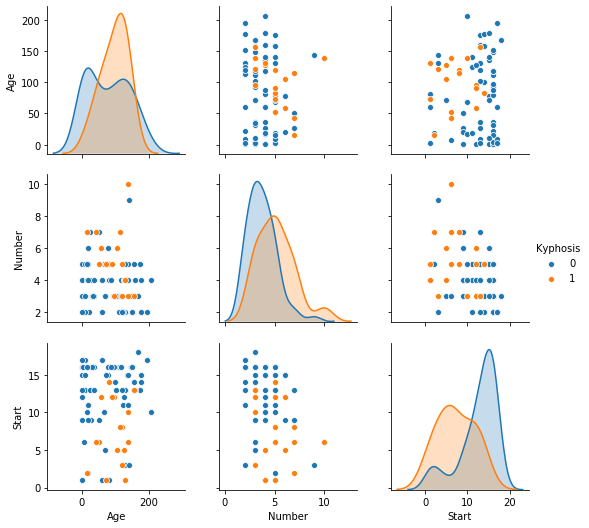

In [19]:
sns.pairplot(dataset, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

## Creating Training and Testing Data

In [20]:
X = dataset.drop('Kyphosis', axis=1)
y = dataset['Kyphosis']

In [21]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [22]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [24]:
X_train.shape

(64, 3)

In [25]:
y_train.shape

(64,)

In [26]:
X_test.shape

(17, 3)

In [27]:
y_test.shape

(17,)

## Model Training

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
feature_importance = pd.DataFrame(decisiontree_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

In [30]:
feature_importance

,importance
Age,0.266131
Number,0.148199
Start,0.585670


In [31]:
feature_importance = pd.DataFrame(decisiontree_classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [32]:
feature_importance

,importance
Start,0.585670
Age,0.266131
Number,0.148199


## Model Testing

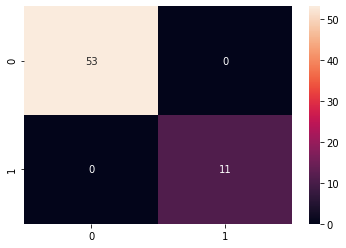

In [33]:
y_predict_train = decisiontree_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

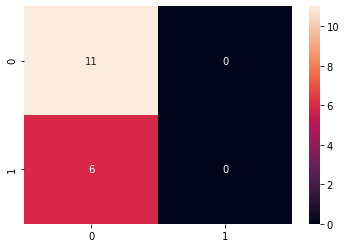

In [34]:
y_predict = decisiontree_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17



C:\Users\Comp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improving the Model

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

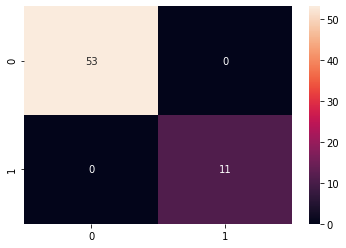

In [49]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

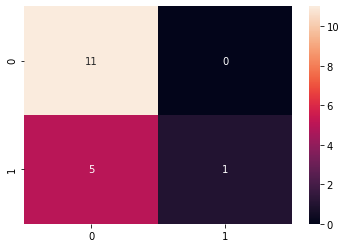

In [50]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17

